In [71]:
import pandas as pd
import numpy as np
import pickle 

In [72]:
#importer 
df_mentors = pd.read_excel('/Users/thiarakante/Documents/Databeez/Matching-user-mentorat/Back/data/Mentors.xlsx')
df_mentors.head()

,Horodateur,Adresse e-mail,"Prénom, Nom",Quel est ton métier et ta situation professionnelle actuelle ?,Domaine principal d'expertise,Combien d'années d'expérience avez vous dans ce domaine ?,Sélectionne ton principal objectif en tant que mentor,Liste les compétences clés que tu peux transmettre à des apprenants dans ce domaine ou métier,"Partage un fun fact sur toi ou ton caractère et ta personnalité, quelque chose qui va te connecter humainement aux apprenants",Quels sont les jours où tu serais disponible pour des sessions d'1h30 par semaine,Quelles sont les périodes de la journée où tu serais disponible?,Le tarif de 25.000 F CFA par apprenant par mois te conviendrait ?,Es-tu prêt à offrir gratuitement une première séance d'évaluation et proposition de planning aux apprenants ?,"Des remarques, suggestions ou questions ?"
0,2025-06-30 18:06:44.369,abdoulazizgueye008@gmail.com,abdoul aziz gueye,analyste et gestion de donnee,Intelligence Artificielle et Data,3 - 5,Contribuer à un projet à impact en Afrique,Python,NaN,"Vendredi, Samedi",Soir (18h-21h),Oui,Oui,NaN
1,2025-06-30 18:08:46.378,raouledah@gmail.com,Raoul,Chef d'entreprise,Softskills & Leadership,5 - 9,Partager mon savoir-faire et mon expérience,"IA Générative, Communication, Marketing, Résea...",Je suis aimable et abordable toujours prêt à c...,"Mardi, Mercredi, Jeudi, Vendredi, Samedi, Dima...",Aprés-midi (13h-17h),Oui,Oui,Non
2,2025-06-30 18:12:31.416,mohamedcissejaysun313@gmail.com,Mouhamadou Cissé,Marketing digital/Générative d'IA,Marketing Digital,3 - 5,Aider des profils débutants à progresser,"IA Générative, Marketing, Réseaux sociaux, Sof...",NaN,"Mardi, Mercredi, Vendredi, Samedi","Aprés-midi (13h-17h), Soir (18h-21h)",Oui,Oui,NaN
3,2025-06-30 18:12:33.449,dioufmariam08@gmail.com,Marème Diouf,"Data Analyst, Freelance",Intelligence Artificielle et Data,3 - 5,Aider des profils débutants à progresser,"Python, Sql, Analyse de données, data visualiz...",NaN,Mercredi,Matin (8h-12h),Oui,Oui,NaN
4,2025-06-30 18:13:31.644,toubanews@gmail.com,ALY LOM,Inspecteur de l'enseignement moyen secondaire,Intelligence Artificielle et Data,3 - 5,Aider des profils débutants à progresser,"IA Générative, Communication, Marketing, Résea...",NaN,"Jeudi, Vendredi, Samedi","Aprés-midi (13h-17h), Soir (18h-21h)",Oui,Oui,"Pour les échanges mails, je préfère cette adre..."


In [73]:
print(df_mentors.columns.tolist())


['Horodateur', 'Adresse e-mail', 'Prénom, Nom', 'Quel est ton métier et ta situation professionnelle actuelle ?', "Domaine principal d'expertise", "Combien d'années d'expérience avez vous dans ce domaine ?", 'Sélectionne ton principal objectif en tant que mentor', 'Liste les compétences clés que tu peux transmettre à des apprenants dans ce domaine ou métier', 'Partage un fun fact sur toi ou ton caractère et ta personnalité, quelque chose qui va te connecter humainement aux apprenants ', "Quels sont les jours où tu serais disponible pour des sessions d'1h30 par semaine", 'Quelles sont les périodes de la journée où tu serais disponible?', 'Le tarif de 25.000 F CFA par apprenant par mois te conviendrait ? ', "Es-tu prêt à offrir gratuitement une première séance d'évaluation et proposition de planning aux apprenants ? ", 'Des remarques, suggestions ou questions ? ']


In [74]:
df_mentors["profil_textuel"] = (
    df_mentors["Quel est ton métier et ta situation professionnelle actuelle ?"].astype(str) + " " +
    df_mentors["Domaine principal d'expertise"].astype(str) + " " +
    df_mentors["Combien d'années d'expérience avez vous dans ce domaine ?"].astype(str) + " " +
    df_mentors["Sélectionne ton principal objectif en tant que mentor"].astype(str) + " " +
    df_mentors["Liste les compétences clés que tu peux transmettre à des apprenants dans ce domaine ou métier"].astype(str) + " " +
    # df_mentors["Partage un fun fact sur toi ou ton caractère et ta personnalité, quelque chose qui va te connecter humainement aux apprenants "].astype(str) + " " +
    # df_mentors["Quels sont les jours où tu serais disponible pour des sessions d'1h30 par semaine"].astype(str) + " " +
    # df_mentors["Quelles sont les périodes de la journée où tu serais disponible?"].astype(str) + " " +
    # df_mentors["Le tarif de 25.000 F CFA par apprenant par mois te conviendrait ? "].astype(str) + " " +
    # df_mentors["Es-tu prêt à offrir gratuitement une première séance d'évaluation et proposition de planning aux apprenants ? "].astype(str) + " " +
    df_mentors["Des remarques, suggestions ou questions ? "].astype(str)
)


In [75]:
df_mentors["id_mentor"] = df_mentors["Adresse e-mail"]
df_mentors["nom_mentor"] = df_mentors["Prénom, Nom"]


In [60]:
df_mentors = df_mentors[["id_mentor", "nom_mentor", "profil_textuel"]]

df_mentors.head()

,id_mentor,nom_mentor,profil_textuel
0,abdoulazizgueye008@gmail.com,abdoul aziz gueye,analyste et gestion de donnee Intelligence Art...
1,raouledah@gmail.com,Raoul,Chef d'entreprise Softskills & Leadership 5 -...
2,mohamedcissejaysun313@gmail.com,Mouhamadou Cissé,Marketing digital/Générative d'IA Marketing D...
3,dioufmariam08@gmail.com,Marème Diouf,"Data Analyst, Freelance Intelligence Artifici..."
4,toubanews@gmail.com,ALY LOM,Inspecteur de l'enseignement moyen secondaire ...


In [76]:
df_mentors.head()

,Horodateur,Adresse e-mail,"Prénom, Nom",Quel est ton métier et ta situation professionnelle actuelle ?,Domaine principal d'expertise,Combien d'années d'expérience avez vous dans ce domaine ?,Sélectionne ton principal objectif en tant que mentor,Liste les compétences clés que tu peux transmettre à des apprenants dans ce domaine ou métier,"Partage un fun fact sur toi ou ton caractère et ta personnalité, quelque chose qui va te connecter humainement aux apprenants",Quels sont les jours où tu serais disponible pour des sessions d'1h30 par semaine,Quelles sont les périodes de la journée où tu serais disponible?,Le tarif de 25.000 F CFA par apprenant par mois te conviendrait ?,Es-tu prêt à offrir gratuitement une première séance d'évaluation et proposition de planning aux apprenants ?,"Des remarques, suggestions ou questions ?",profil_textuel,id_mentor,nom_mentor
0,2025-06-30 18:06:44.369,abdoulazizgueye008@gmail.com,abdoul aziz gueye,analyste et gestion de donnee,Intelligence Artificielle et Data,3 - 5,Contribuer à un projet à impact en Afrique,Python,NaN,"Vendredi, Samedi",Soir (18h-21h),Oui,Oui,NaN,analyste et gestion de donnee Intelligence Art...,abdoulazizgueye008@gmail.com,abdoul aziz gueye
1,2025-06-30 18:08:46.378,raouledah@gmail.com,Raoul,Chef d'entreprise,Softskills & Leadership,5 - 9,Partager mon savoir-faire et mon expérience,"IA Générative, Communication, Marketing, Résea...",Je suis aimable et abordable toujours prêt à c...,"Mardi, Mercredi, Jeudi, Vendredi, Samedi, Dima...",Aprés-midi (13h-17h),Oui,Oui,Non,Chef d'entreprise Softskills & Leadership 5 -...,raouledah@gmail.com,Raoul
2,2025-06-30 18:12:31.416,mohamedcissejaysun313@gmail.com,Mouhamadou Cissé,Marketing digital/Générative d'IA,Marketing Digital,3 - 5,Aider des profils débutants à progresser,"IA Générative, Marketing, Réseaux sociaux, Sof...",NaN,"Mardi, Mercredi, Vendredi, Samedi","Aprés-midi (13h-17h), Soir (18h-21h)",Oui,Oui,NaN,Marketing digital/Générative d'IA Marketing D...,mohamedcissejaysun313@gmail.com,Mouhamadou Cissé
3,2025-06-30 18:12:33.449,dioufmariam08@gmail.com,Marème Diouf,"Data Analyst, Freelance",Intelligence Artificielle et Data,3 - 5,Aider des profils débutants à progresser,"Python, Sql, Analyse de données, data visualiz...",NaN,Mercredi,Matin (8h-12h),Oui,Oui,NaN,"Data Analyst, Freelance Intelligence Artifici...",dioufmariam08@gmail.com,Marème Diouf
4,2025-06-30 18:13:31.644,toubanews@gmail.com,ALY LOM,Inspecteur de l'enseignement moyen secondaire,Intelligence Artificielle et Data,3 - 5,Aider des profils débutants à progresser,"IA Générative, Communication, Marketing, Résea...",NaN,"Jeudi, Vendredi, Samedi","Aprés-midi (13h-17h), Soir (18h-21h)",Oui,Oui,"Pour les échanges mails, je préfère cette adre...",Inspecteur de l'enseignement moyen secondaire ...,toubanews@gmail.com,ALY LOM


In [78]:
with open("model/df_mentor.pkl", "wb") as f:
    pickle.dump(df_mentors, f)


In [62]:
df_etudiants = pd.read_excel('/Users/thiarakante/Documents/Databeez/Matching-user-mentorat/Back/data/data_user.xlsx')
df_etudiants.head()

,Horodateur,Adresse e-mail,Quel est ton principal objectif professionnel ?,Quelle formation serait idéale pour toi ?,Quel format de formation vous convient le plus?,Quelle est ton métier et ta situation professionnelle actuelle ?,Quel est budget que vous seriez prêt à mettre sous garantie d'atteinte de votre objectif principal?,"Des remarques, suggestions ou questions ?"
0,2025-06-14 15:23:43.871,a.maguette.toure@gmail.com,"Trouver un nouvel emploi, Entreprendre, Amélio...",IA appliquée à mon domaine,"Formation en autonomie (vidéos personnalisées,...",Planification suivi évaluation de projets,Sans budget,NaN
1,2025-06-14 15:41:40.897,a.maguette.toure@gmail.com,"Avoir une promotion, Entreprendre",IA appliquée à mon domaine,Formation avec un expert (en visio ou en prése...,Immobilier et informaticien,NaN,NaN
2,2025-06-14 15:53:48.132,maguette.toure@data-beez.com,Trouver un nouvel emploi,IA appliquée à mon domaine,FORMATION EN PDF,TELECOMMUNICATION,00,NaN
3,2025-06-14 16:27:18.112,maguette.toure@data-beez.com,"Trouver un nouvel emploi, Entreprendre, Amélio...",IA appliquée à mon domaine,"Formation en autonomie (vidéos personnalisées,...",developpeur php freelance,pas assez,la formation est elle payante ou subventionnée
4,2025-06-14 17:03:18.241,matyysylla@gmail.com,Améliorer mes compétences,IA appliquée à mon domaine,Formation avec un expert (en visio ou en prése...,COO à Databeez,200000,RAS


In [63]:
print(df_etudiants.columns.tolist())


['Horodateur', 'Adresse e-mail', 'Quel est ton principal objectif professionnel ?', 'Quelle formation serait idéale pour toi ?', 'Quel format de formation vous convient le plus? ', 'Quelle est ton métier et ta situation professionnelle actuelle ?', "Quel est budget que vous seriez prêt à mettre sous garantie d'atteinte de votre objectif principal? ", 'Des remarques, suggestions ou questions ? ']


In [64]:
df_etudiants["profil_textuel"] = (
    df_etudiants["Quel est ton principal objectif professionnel ?"].astype(str) + " " +
    df_etudiants["Quelle formation serait idéale pour toi ?"].astype(str) + " " +
    df_etudiants["Quel format de formation vous convient le plus? "].astype(str) + " " +
    df_etudiants["Quelle est ton métier et ta situation professionnelle actuelle ?"].astype(str) + " " +
    # df_etudiants["Quel est budget que vous seriez prêt à mettre sous garantie d'atteinte de votre objectif principal? "].astype(str) + " " +
    df_etudiants["Des remarques, suggestions ou questions ? "].astype(str))


In [65]:
df_etudiants["id_etudiant"] = df_etudiants["Adresse e-mail"]
df_etudiants = df_etudiants[["id_etudiant", "profil_textuel"]]
df_etudiants.head()


,id_etudiant,profil_textuel
0,a.maguette.toure@gmail.com,"Trouver un nouvel emploi, Entreprendre, Amélio..."
1,a.maguette.toure@gmail.com,"Avoir une promotion, Entreprendre IA appliquée..."
2,maguette.toure@data-beez.com,Trouver un nouvel emploi IA appliquée à mon do...
3,maguette.toure@data-beez.com,"Trouver un nouvel emploi, Entreprendre, Amélio..."
4,matyysylla@gmail.com,Améliorer mes compétences IA appliquée à mon d...


#### Généreration d'embeddings des profils textuels

In [66]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Générer les embeddings
embeddings_mentors = model.encode(df_mentors["profil_textuel"].tolist(), convert_to_tensor=True)


embeddings_etudiants = model.encode(df_etudiants["profil_textuel"].tolist(), convert_to_tensor=True)


In [67]:
from sentence_transformers import SentenceTransformer
import pickle

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings_mentors = model.encode(df_mentors["profil_textuel"].tolist(), convert_to_tensor=True)

with open("model/embeddings_mentors.pkl", "wb") as f:
    pickle.dump(embeddings_mentors, f)

with open("model/df_mentors.pkl", "wb") as f:
    pickle.dump(df_mentors, f)


In [32]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# convertir les tensor en tableau numpy
embeddings_etudiants_np = embeddings_etudiants.cpu().numpy()
embeddings_mentors_np = embeddings_mentors.cpu().numpy()

similarites = cosine_similarity(embeddings_etudiants_np, embeddings_mentors_np)


In [33]:
print("Similarités entre les profils étudiants et mentors :")
print(similarites)

Similarités entre les profils étudiants et mentors :
[[0.45762086 0.6446311  0.57511044 ... 0.5290762  0.43448782 0.520827  ]
 [0.48866516 0.6709923  0.6215046  ... 0.6230121  0.5004317  0.48499733]
 [0.4726098  0.47820643 0.5485928  ... 0.43386766 0.39263096 0.41334996]
 ...
 [0.45699427 0.6183525  0.5516038  ... 0.592025   0.49572578 0.4679727 ]
 [0.2926953  0.46168023 0.42661867 ... 0.29984102 0.26759705 0.34242702]
 [0.47825715 0.6337977  0.5620621  ... 0.62234765 0.50745416 0.49953318]]


In [34]:
import numpy as np

indices_mentors = np.argmax(similarites, axis=1)


In [46]:
print(indices_mentors)

[44 55 44 44 55 55 55  8 53 55 23 55 44 55 55  8 55 44 44 55 34 30 44 55
 55 55 55 55 55 55 53 23 55 55 55 48 55 51 55 58 55 55 55 11 55]


In [36]:
resultats = []

for i, idx_mentor in enumerate(indices_mentors):
    etudiant = df_etudiants.iloc[i]
    mentor = df_mentors.iloc[idx_mentor]
    
    resultats.append({
        "id_etudiant": etudiant["id_etudiant"],
        "id_mentor": mentor["id_mentor"],
        "nom_mentor": mentor["nom_mentor"],
        "score_similarite": similarites[i][idx_mentor]
    })

df_resultats = pd.DataFrame(resultats)
df_resultats.to_excel('/Users/thiarakante/Documents/Databeez/Matching-user-mentorat/Back/data/resultats_matching.xlsx', index=False)
print("Résultats du matching enregistrés dans 'resultats_matching.xlsx'")

Résultats du matching enregistrés dans 'resultats_matching.xlsx'


In [38]:
# Récupérer les 3 mentors les plus similaires pour chaque étudiant
top_mentors = []

# Pour chaque étudiant, on récupère les 3 indices de mentors les plus similaires
for i, similarities in enumerate(similarites):
    top_indices = np.argsort(similarities)[-3:][::-1]  # top 3 en ordre décroissant
    id_etudiant = df_etudiants.iloc[i]["id_etudiant"]
    for rank, mentor_idx in enumerate(top_indices, start=1):
        id_mentor = df_mentors.iloc[mentor_idx]["id_mentor"]
        score = similarities[mentor_idx]
        top_mentors.append({
            "id_etudiant": id_etudiant,
            "id_mentor": id_mentor,
            "rang": rank,
            "score_similarite": round(score, 3)
        })

# Résultat sous forme de DataFrame
df_top3 = pd.DataFrame(top_mentors)
df_top3.head(10)


,id_etudiant,id_mentor,rang,score_similarite
0,a.maguette.toure@gmail.com,diamil.dev@gmail.com,1,0.715
1,a.maguette.toure@gmail.com,anthonymboumba27@gmail.com,2,0.686
2,a.maguette.toure@gmail.com,raouledah@gmail.com,3,0.645
3,a.maguette.toure@gmail.com,anthonymboumba27@gmail.com,1,0.705
4,a.maguette.toure@gmail.com,toubanews@gmail.com,2,0.691
5,a.maguette.toure@gmail.com,ibrahima.ba58@unchk.edu.sn,3,0.680
6,maguette.toure@data-beez.com,diamil.dev@gmail.com,1,0.615
7,maguette.toure@data-beez.com,baaly32@gmail.com,2,0.584
8,maguette.toure@data-beez.com,assanefall1993@gmail.com,3,0.577
9,maguette.toure@data-beez.com,diamil.dev@gmail.com,1,0.748


In [41]:
df_top3 = df_top3.merge(df_mentors[['id_mentor', 'nom_mentor']], on='id_mentor', how='left')


/var/folders/59/n1y53hk12zlcs6n7g_sp5qp00000gn/T/ipykernel_51308/2057860736.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


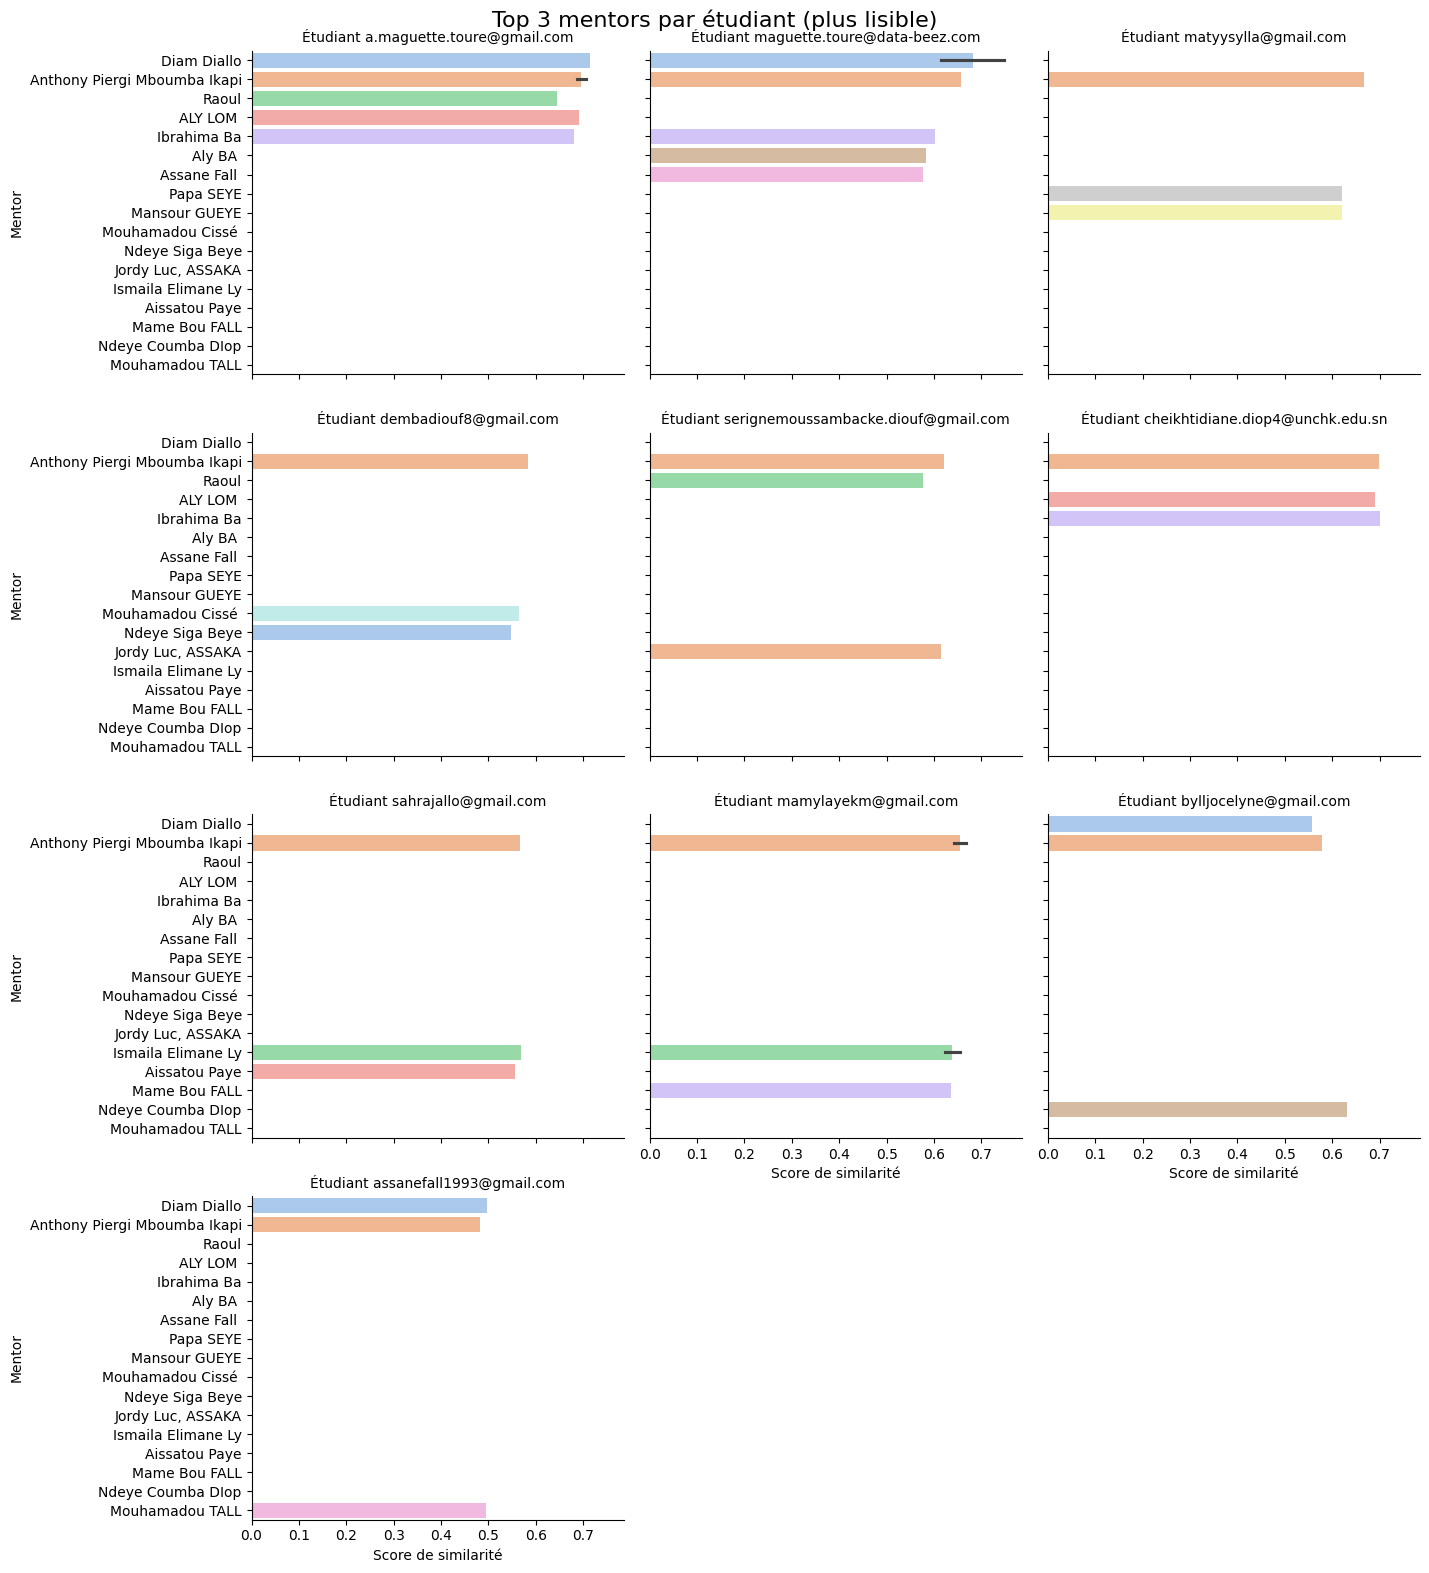

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner 5 étudiants pour l'exemple
etudiants_a_visualiser = df_top3["id_etudiant"].unique()[:10]
df_visu = df_top3[df_top3["id_etudiant"].isin(etudiants_a_visualiser)]

# Créer un graphe en facettes : un subplot par étudiant
g = sns.catplot(
    data=df_visu,
    kind="bar",
    x="score_similarite",
    y="nom_mentor",
    col="id_etudiant",
    col_wrap=3,
    height=4,
    aspect=1.2,
    palette="pastel"
)

g.set_titles("Étudiant {col_name}")
g.set_axis_labels("Score de similarité", "Mentor")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Top 3 mentors par étudiant", fontsize=16)
plt.tight_layout()
plt.show()
